## APLICAÇÃO DE ALGORITMO GENÉTICO PARA OTIMIZAR A COMPRA DE PASSAGENS AÉREAS

O problema se trata de 6 amigos que irão se encontrar em Roma. 

Essas pessoas irão andar juntas pela cidade sempre. Após o fim do passeio, todas vão voltar juntas ao aeroporto para cada uma ir para o seu país.

O código precisa definir quais passagens devem ser compradas para diminuir ao máximo 3 coisas:

 1 - O tempo de espera da primeira pessoa até a última pessoa a chegar em Roma.

 2 - O tempo de espera da primeira pessoa até a última pessoa a ir embora de Roma.

 3 - O valor total de todas as passagens compradas.

In [667]:
import time
import random
import math
import sys

In [668]:
pessoas = [('Lisbon', 'LIS'),
           ('Madrid', 'MAD'),
           ('Paris', 'CDG'),
           ('Dublin', 'DUB'),
           ('Brussels', 'BRU'),
           ('London', 'LHR')]

In [669]:
destino = 'FCO' # Roma

In [670]:
# ORIGEM - DESTINO - HORA DE SAÍDA - HORA DE CHEGADA - PREÇO DA PASSAGEM
voos = {('BRU', 'FCO'): ['15:44', '18:55', 382]}

In [671]:
voos

{('BRU', 'FCO'): ['15:44', '18:55', 382]}

In [672]:
voos = {}
for linha in open('flights.txt'):
    #print(linha)
    #print(linha.split(','))
    origem, destino, partida, chegada, preco = linha.split(',')
    #print(origem, destino, partida, chegada, preco)
    voos.setdefault((origem, destino), [])
    voos[(origem, destino)].append((partida, chegada, int(preco)))

In [673]:
voos.keys()


dict_keys([('FCO', 'LIS'), ('LIS', 'FCO'), ('FCO', 'MAD'), ('MAD', 'FCO'), ('FCO', 'CDG'), ('CDG', 'FCO'), ('FCO', 'DUB'), ('DUB', 'FCO'), ('FCO', 'BRU'), ('BRU', 'FCO'), ('FCO', 'LHR'), ('LHR', 'FCO')])

In [674]:
voos

{('FCO', 'LIS'): [('6:19', '8:13', 239),
  ('8:04', '10:59', 136),
  ('9:31', '11:43', 210),
  ('11:07', '13:24', 171),
  ('12:31', '14:02', 234),
  ('14:05', '15:47', 226),
  ('15:07', '17:21', 129),
  ('16:35', '18:56', 144),
  ('18:25', '20:34', 205),
  ('20:05', '21:44', 172)],
 ('LIS', 'FCO'): [('6:11', '8:31', 249),
  ('7:39', '10:24', 219),
  ('9:15', '12:03', 99),
  ('11:08', '13:07', 175),
  ('12:18', '14:56', 172),
  ('13:37', '15:08', 250),
  ('15:03', '16:42', 135),
  ('16:51', '19:09', 147),
  ('18:12', '20:17', 242),
  ('20:05', '22:06', 261)],
 ('FCO', 'MAD'): [('6:03', '8:43', 219),
  ('7:50', '10:08', 164),
  ('9:11', '10:42', 172),
  ('10:33', '13:11', 132),
  ('12:08', '14:47', 231),
  ('14:19', '17:09', 190),
  ('15:04', '17:23', 189),
  ('17:06', '20:00', 95),
  ('18:33', '20:22', 143),
  ('19:32', '21:25', 160)],
 ('MAD', 'FCO'): [('6:05', '8:32', 174),
  ('8:25', '10:34', 157),
  ('9:42', '11:32', 169),
  ('11:01', '12:39', 260),
  ('12:44', '14:17', 134),
  ('14

In [675]:
# [1,4, 3,2, 7,3, 6,3, 2,4, 5,3]
# Indica que LIS - FCO será voo 1 para ida e 4 para volta

In [676]:
def imprime_calendario(calendario):
  voo_id = -1
  preco_total = 0
  sep = '-----'
  for i in range(len(calendario) // 2): # Cada cidade terá 2 voos
    nome = pessoas[i][0] # Nome da cidade
    #print(nome)
    origem = pessoas[i][1] # Sigla do aeroporto
    #print(origem)
    voo_id += 1
    voo_ida = voos[(origem, destino)][calendario[voo_id]]
    #print(voo_ida)
    preco_total += voo_ida[2]
    voo_id += 1
    voo_volta = voos[(destino, origem)][calendario[voo_id]]
    preco_total += voo_volta[2]
    print('%10s%10s %5s-%5s U$%3s %3s %5s-%5s U$%3s' % (nome, origem, voo_ida[0], voo_ida[1], voo_ida[2], sep,
                                                    voo_volta[0], voo_volta[1], voo_volta[2]))
  
  print('Preço total: ', preco_total)

In [677]:
imprime_calendario([1,4, 3,2, 7,3, 6,3, 2,4, 5,3])

    Lisbon       LIS  7:39-10:24 U$219 ----- 12:31-14:02 U$234
    Madrid       MAD 11:01-12:39 U$260 -----  9:11-10:42 U$172
     Paris       CDG 17:07-20:04 U$291 ----- 11:08-14:38 U$262
    Dublin       DUB 15:27-17:18 U$151 ----- 10:33-12:03 U$ 74
  Brussels       BRU  9:08-12:12 U$364 ----- 12:20-16:34 U$500
    London       LHR 13:40-15:38 U$137 ----- 10:32-13:16 U$139
Preço total:  2803


In [678]:
t = time.strptime('7:39', '%H:%M')

In [679]:
t

time.struct_time(tm_year=1900, tm_mon=1, tm_mday=1, tm_hour=7, tm_min=39, tm_sec=0, tm_wday=0, tm_yday=1, tm_isdst=-1)

In [680]:
t[3], t[4], t[3]*60 + t[4]

(7, 39, 459)

In [681]:
def get_minutos(hora):
    t = time.strptime(hora, '%H:%M')
    minutos = t[3] * 60 + t[4]
    return minutos

* CRIANDO FUNÇÃO FITNESS (AVALIAÇÃO)

In [682]:
def funcao_avaliacao(calendario):
    preco_total = 0
    ultima_chegada = 0
    primeira_partida = 1439 # Horário que todos devem estar no aeroporto para o primeiro ir embora
    # 23:59 é o pior horário possivel. Vale 1439 minutos.

    voo_id = -1
    for i in range(len(calendario) // 2):
        origem = pessoas[i][1]
        voo_id += 1
        voo_ida = voos[(origem, destino)][calendario[voo_id]]
        voo_id += 1
        voo_volta = voos[(destino, origem)][calendario[voo_id]]

        preco_total += voo_ida[2]
        preco_total += voo_volta[2]

        if ultima_chegada < get_minutos(voo_ida[1]):
            ultima_chegada = get_minutos(voo_ida[1])
        if primeira_partida > get_minutos(voo_volta[0]):
            primeira_partida = get_minutos(voo_volta[0])

    #print(preco_total)
    #print(ultima_chegada)
    #print(primeira_partida)

    espera_total = 0
    voo_id = -1
    for i in range(len(calendario) // 2):
        origem = pessoas[i][1]
        voo_id += 1
        voo_ida = voos[(origem, destino)][calendario[voo_id]]
        voo_id += 1
        voo_volta = voos[(destino, origem)][calendario[voo_id]]

        espera_total += ultima_chegada - get_minutos(voo_ida[1])
    #print()
    #print(ultima_chegada - get_minutos(voo_ida[1])) # Mostra o tempo de espera da primeira até a última chegada
    espera_total += get_minutos(voo_volta[0]) - primeira_partida
    # espera_total leva em conta o tempo de espera do primeiro ao chegar em Roma e o do último a ir embora de Roma
    #print()
    #print(get_minutos(voo_volta[0]) - primeira_partida) # Mostra o tempo de espera da primeira até a última saída

    return espera_total + preco_total # O que quero minimizar
    

In [683]:
funcao_avaliacao([1,4, 3,2, 7,3, 6,3, 2,4, 5,3])

4813

# RESUMO ALGORITMO GENÉTICO

1 - Criar população inicial com soluções aleatórias. 

2 - Cada numeração do voo é um gene de um cromossomo.

3 - Avaliar a população.

4 - Se não chegar no critério de parada, continuar a execução do algoritmo.

5 - Definir uma forma de escolher os melhores indivíduos. Roleta viciada ou porcentagem do total de indivíduos.

6 - Aplicar mutação e crossover.

7 - Avaliar a população.

8 - Definir população sobrevivente.

9 - Executar de novo até chegar no critério de parada (normalmente um valor x de gerações)

10 - Ao chegar no critério de parada, exibir os melhores indivíduos das gerações.

### Mutação

In [684]:
dominio = [(0, 9)] * (len(pessoas) * 2)
dominio, len(dominio)

([(0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9)],
 12)

In [685]:
random.random()

0.9565880045736557

In [686]:
def mutacao(dominio, passo, calendario, probabilidade):
  gene = random.randint(0, len(dominio) - 1)
  #print(gene)
  mutante = calendario
  if random.random() < probabilidade: # 0.02, 0.05
    if calendario[gene] != dominio[gene][0]:
      mutante = calendario[0:gene] + [calendario[gene] - passo] + calendario[gene + 1:]
      #print(mutante)
    else:
      if calendario[gene] != dominio[gene][1]:
        mutante = calendario[0:gene] + [calendario[gene] + passo] + calendario[gene + 1:]
  return mutante

In [687]:
mutacao(dominio, 1, [6, 7, 6, 7, 3, 9, 7, 7, 0, 7, 6, 7], 0.05)

[6, 7, 6, 7, 3, 9, 7, 7, 0, 7, 6, 7]

In [688]:
def crossover(dominio, individuo1, individuo2):
  gene = random.randint(1, len(dominio) - 2)
  #print(gene)
  return individuo1[0:gene] + individuo2[gene:]

### ALGORITMO GENETICO COMPLETO

In [689]:
def algoritmo_genetico(dominio, funcao_avaliacao, tamanho_populacao = 100, passo = 1,
                       elitismo = 0.2, numero_geracoes = 500, probabilidade_mutacao = 0.05):
  populacao = []
  for i in range(tamanho_populacao): # Criando 100 indivíduos aleatórios
    individuo = [random.randint(dominio[i][0], dominio[i][1]) for i in range(len(dominio))]
    populacao.append(individuo)
  #print(populacao)
  #print(len(populacao))
  # O método da escolha dos pais será o elitismo
  numero_elitismo = int(elitismo * tamanho_populacao) # Selecionando 20% dos indivíduos
  #print(numero_elitismo)
  #print('Tamanho da população: ', len(populacao))

  melhores_valores_das_geracoes = []
  for i in range(numero_geracoes): # 500 é o critério de parada
    custos = [(funcao_avaliacao(individuo), individuo) for individuo in populacao] # Criando tuplas
    #print(custos)
    custos.sort() # Ordenando em ordem crescente
    melhores_valores_das_geracoes.append(custos[0][0])
    #print(custos)
    individuos_ordenados = [individuo for (custo, individuo) in custos]
    #print(individuos_ordenados)
    populacao = individuos_ordenados[0:numero_elitismo] # 0:2
    while len(populacao) < tamanho_populacao:
      i1 = random.randint(0, numero_elitismo)
      i2 = random.randint(0, numero_elitismo)
      #print(i1, i2, individuos_ordenados[i1], individuos_ordenados[i2])
      novo_individuo = crossover(dominio, individuos_ordenados[i1], individuos_ordenados[i2])
      #print(novo_individuo)
      mutacao_novo_individuo = mutacao(dominio, passo, novo_individuo, probabilidade_mutacao)
      #print(novo_individuo)
      #print(mutacao_novo_individuo)
      #print()
      populacao.append(mutacao_novo_individuo)

    #print('Tamanho da população: ', len(populacao))
  #print(custos)
  return custos[0][1], melhores_valores_das_geracoes

In [690]:
solucao, melhores_geracoes = algoritmo_genetico(dominio, funcao_avaliacao, numero_geracoes = 200, tamanho_populacao=200, 
                             elitismo = 0.2, probabilidade_mutacao = 0.05)

In [691]:
solucao

[6, 6, 6, 3, 6, 1, 7, 6, 5, 2, 6, 1]

In [692]:
funcao_avaliacao(solucao)

2355

In [693]:
imprime_calendario(solucao)

    Lisbon       LIS 15:03-16:42 U$135 ----- 15:07-17:21 U$129
    Madrid       MAD 15:58-18:40 U$173 ----- 10:33-13:11 U$132
     Paris       CDG 15:34-18:11 U$326 -----  8:23-11:07 U$143
    Dublin       DUB 17:11-18:30 U$108 ----- 15:25-16:58 U$ 62
  Brussels       BRU 13:54-18:02 U$294 -----  9:49-13:51 U$229
    London       LHR 15:23-17:25 U$232 -----  8:19-11:16 U$122
Preço total:  2085


Text(0, 0.5, 'Acumulado de tempo de espera + passagens')

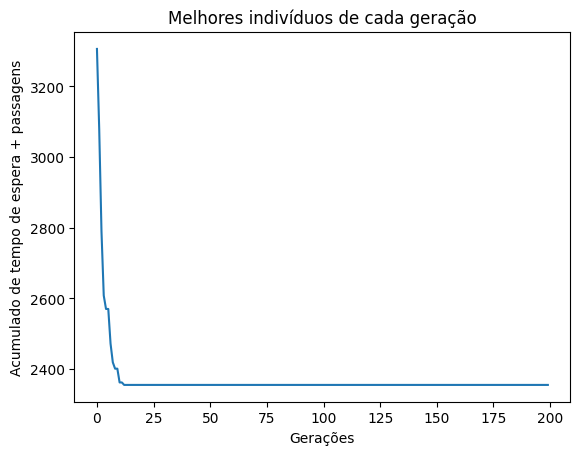

In [694]:
import matplotlib.pyplot as plt

plt.plot(melhores_geracoes)
plt.title('Melhores indivíduos de cada geração')
plt.xlabel('Gerações')
plt.ylabel('Acumulado de tempo de espera + passagens')